  0%|                                                             | 0/31 [00:00<?, ?it/s]/opt/homebrew/lib/python3.9/site-packages/sklearn/decomposition/_incremental_pca.py:348: RuntimeWarning: Mean of empty slice.
  self.noise_variance_ = explained_variance[self.n_components_ :].mean()
/opt/homebrew/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████████████| 31/31 [07:18<00:00, 14.15s/it]


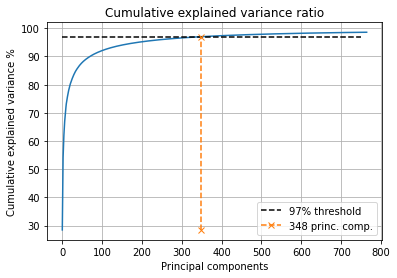

In [2]:
from pickletools import uint8
import sklearn.preprocessing as preproc
from sklearn.decomposition import PCA, FastICA, NMF, DictionaryLearning, IncrementalPCA
import scipy.linalg as lng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
from tqdm import tqdm
import os
%run my_functions.ipynb

# Globals
_LOAD_DATA = False
_RGB_LOAD = False
# Set the paths for image files, labels etc
faces_path = "../data/Faces/"
labels_path = "../data/labels.csv"
names_path = "../data/filenames.txt"

data_set_gray_npy = '../files/data_gray.npy'
data_set_rgb_npy = '/files/data_rgb.npy'
labels_csv_path = 'data_labels.csv'
# Get labels as pandas object from labels.csv
labels = get_labels_df(
    labels_path=labels_path, names_path=names_path)

# Put age in bins
age_bin_width_years = 10
ages = labels.age.values//age_bin_width_years  # bin_width fully lived
labels.drop(['age'], axis=1, inplace=True)
labels['age_bin'] = ages


# Open a random image to get dimensions
h, w = get_dimensions_from_an_image(faces_path, 0, as_gray=True)

X = np.load(data_set_gray_npy)
dirs = os.listdir(faces_path)

incr_pca = IncrementalPCA(copy=False)
n_pc = 750
n_batches = len(dirs)//n_pc
for X_batch in tqdm(np.array_split(X, n_batches)):
    incr_pca.partial_fit(X_batch)

cmsm = np.cumsum(incr_pca.explained_variance_ratio_)*100

threshold = 97  # percent cutoff ratio

last_princ_comp = np.argmax(cmsm >= threshold)+1

plt.plot(cmsm)
plt.plot([0, n_pc], [threshold, threshold],
         'k--', label=f"{threshold}% threshold")
plt.plot([last_princ_comp, last_princ_comp], [min(cmsm),
         threshold], 'x--', label=f"{last_princ_comp} princ. comp.")
plt.title('Cumulative explained variance ratio')
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance %')
plt.legend()
plt.grid()
plt.show()

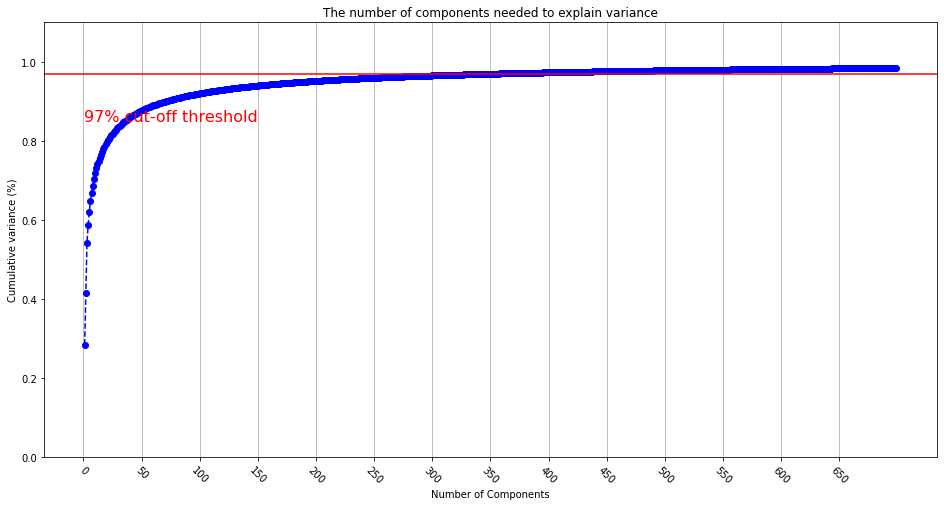

In [3]:
plt.rcParams["figure.figsize"] = (16,8)

fig, ax = plt.subplots()
xi = np.arange(1, 700, step=1)
y = np.cumsum(incr_pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y[:699], marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 700, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)
plt.xticks(rotation=-45)

ax.grid(axis='x')
plt.show()